# TP 2: Linear regression

## Exercise 1

### 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/invest.txt" \
                  , sep=" ")
data.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


### 2)

In [20]:
# getting x and Y from dataframe
X = data['gnp']
y = data['invest']

(100, 500)

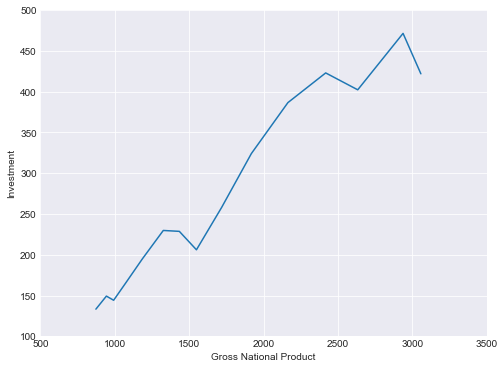

In [21]:
# plotting graph
sns.set_style("darkgrid")

plt.figure(figsize=(8,6))
plt.plot(X,y)
plt.xlabel("Gross National Product")
plt.ylabel("Investment")
plt.xlim(500,3500)
plt.ylim(100,500)

In [22]:
# transforming both variables to a log scale
X = np.log(X) # log(gnp)
y = np.log(y) # log(invest)

### 3)

In [34]:
# Compute average of Y and x
X_avg, y_avg = np.average(X), np.average(y)

# Compute slope using correlation between Y and y and their variances
theta1 = X.corr(y)*np.sqrt(y.var())/np.sqrt(X.var())

# Compute intercept using slope and variables avg
theta0 = y_avg - theta1*X_avg

# Empirical variance of noise (sigma_hat^2)
n = X.size
squared_sum_of_residues = sum((y - (theta0 + theta1*X))**2)
sigma_hat = np.sqrt(squared_sum_of_residues/(n-2))

# Standard error for theta0 (using V[beta0] - poly question 12)
useful_sum = sum((X-X_avg)**2)
std_theta0 = np.sqrt(sigma_hat**2 * (1/n + X_avg**2/(useful_sum)))

# Standard error for theta1 (using V[beta1] - poly question 12)
std_theta1 = np.sqrt(sigma_hat**2 / useful_sum)

# R-squared (determination coefficient)
R_squared = 1 - squared_sum_of_residues / sum((y-y_avg)**2)

In [36]:
print("Regression of 'Investment' on 'GNP':")
print(f"Slope: {theta1}")
print(f"Intercept: {theta0}")
print(f"Slope std. error: {std_theta1}")
print(f"Intercept std. error: {std_theta0}")
print(f"R-squared: {R_squared}")

Regression of 'Investment' on 'GNP':
Slope: 1.0152814015988707
Intercept: -1.9635913352301797
Slope std. error: 0.05538306035485282
Intercept std. error: 0.4095472716623082
R-squared: 0.9627572956057855
